In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

# Data

In [3]:
df = pd.read_csv('/Users/beyazituysal/Documents/PythonProjects/MLalgorithm/datasets/fetal_health_Data.csv')

In [4]:
df.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


In [5]:
df.shape

(2126, 22)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

There is zero null value, thats a good thing.

Hiç null değer yok, bu bizim için iyi bir şey.

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
baseline value,2126.0,133.303857,9.840844,106.0,126.000,133.000,140.000,160.000
accelerations,2126.0,0.003178,0.003866,0.0,0.000,0.002,0.006,0.019
fetal_movement,2126.0,0.009481,0.046666,0.0,0.000,0.000,0.003,0.481
uterine_contractions,2126.0,0.004366,0.002946,0.0,0.002,0.004,0.007,0.015
light_decelerations,2126.0,0.001889,0.002960,0.0,0.000,0.000,0.003,0.015
severe_decelerations,2126.0,0.000003,0.000057,0.0,0.000,0.000,0.000,0.001
prolongued_decelerations,2126.0,0.000159,0.000590,0.0,0.000,0.000,0.000,0.005
abnormal_short_term_variability,2126.0,46.990122,17.192814,12.0,32.000,49.000,61.000,87.000
mean_value_of_short_term_variability,2126.0,1.332785,0.883241,0.2,0.700,1.200,1.700,7.000
percentage_of_time_with_abnormal_long_term_variability,2126.0,9.846660,18.396880,0.0,0.000,0.000,11.000,91.000


# EDA

<AxesSubplot: xlabel='fetal_health', ylabel='count'>

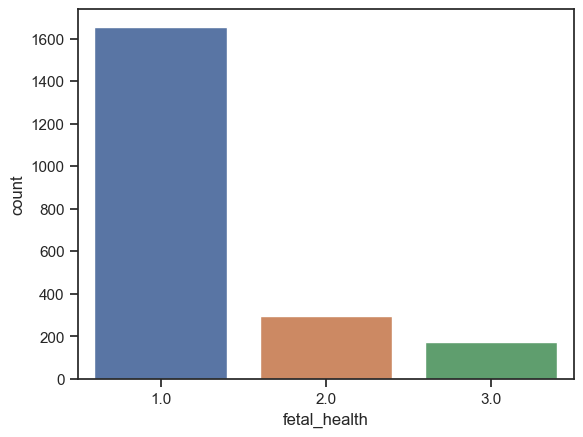

In [27]:
sns.countplot(data= df, x="fetal_health")

[]

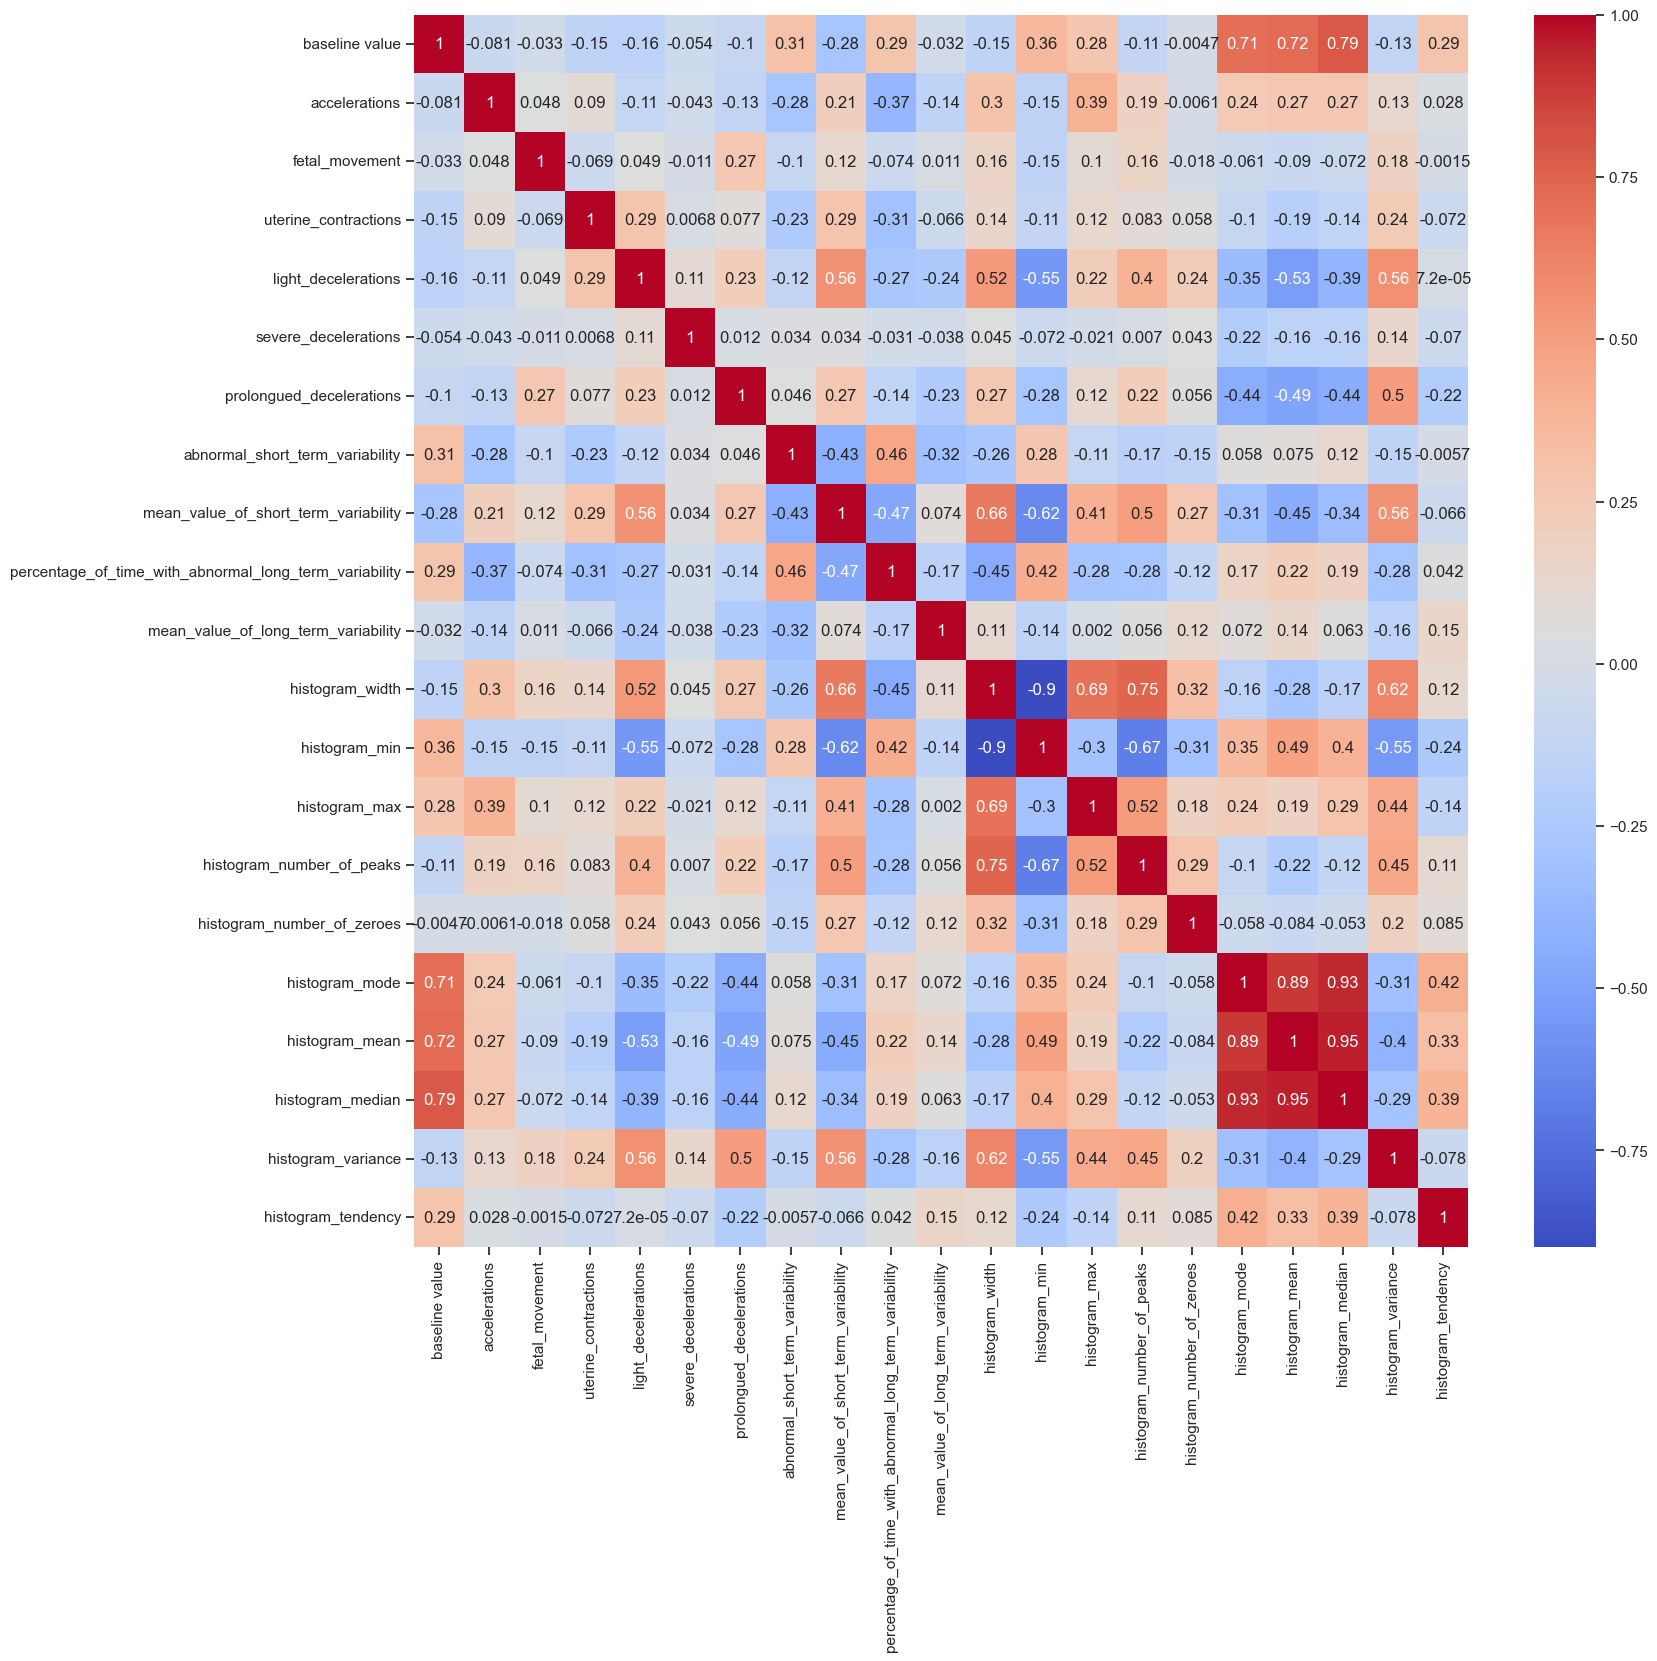

In [25]:
df_without_output = df.drop(['fetal_health'], axis=1)
plt.figure(figsize=(17,16))
sns.heatmap(df_without_output.corr(), annot=True, cmap='coolwarm')
plt.plot()

## plt.figure(figsize=(8,7))
plt.title('histogram_median and histogram_mean')
sns.scatterplot(data=df,x='histogram_median',y='histogram_mean',hue='fetal_health',s=50)

<AxesSubplot: title={'center': 'histogram_median and histogram_mode'}, xlabel='histogram_median', ylabel='histogram_mode'>

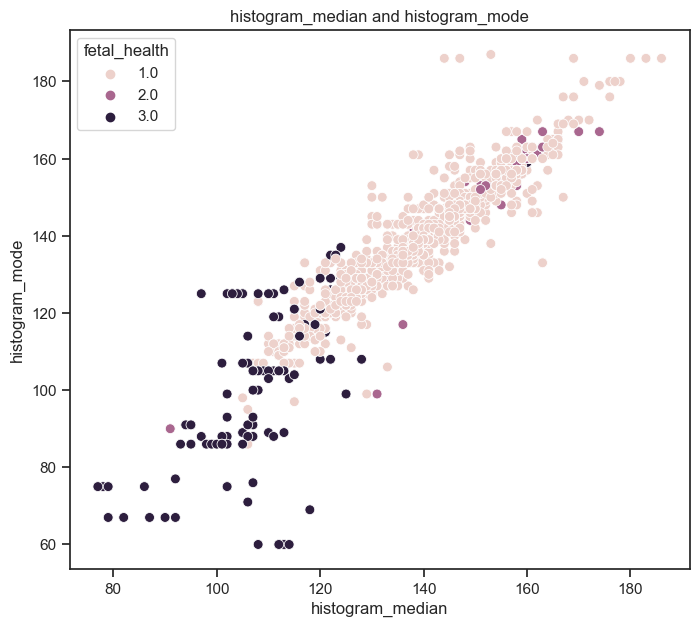

In [31]:
plt.figure(figsize=(8,7))
plt.title('histogram_median and histogram_mode')
sns.scatterplot(data=df,x='histogram_median',y='histogram_mode',hue='fetal_health',s=50)

<AxesSubplot: title={'center': 'histogram_mean and histogram_mode'}, xlabel='histogram_mean', ylabel='histogram_mode'>

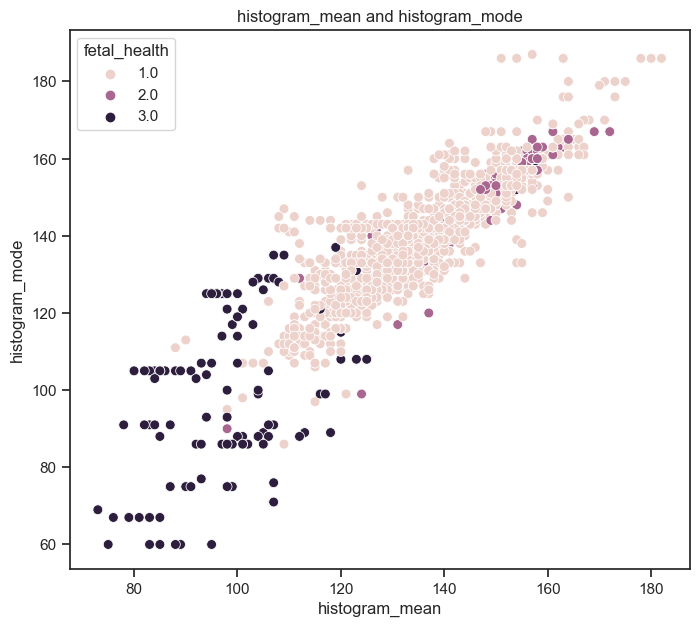

In [32]:
plt.figure(figsize=(8,7))
plt.title('histogram_mean and histogram_mode')
sns.scatterplot(data=df,x='histogram_mean',y='histogram_mode',hue='fetal_health',s=50)

<AxesSubplot: title={'center': 'histogram_median and baseline value'}, xlabel='histogram_median', ylabel='baseline value'>

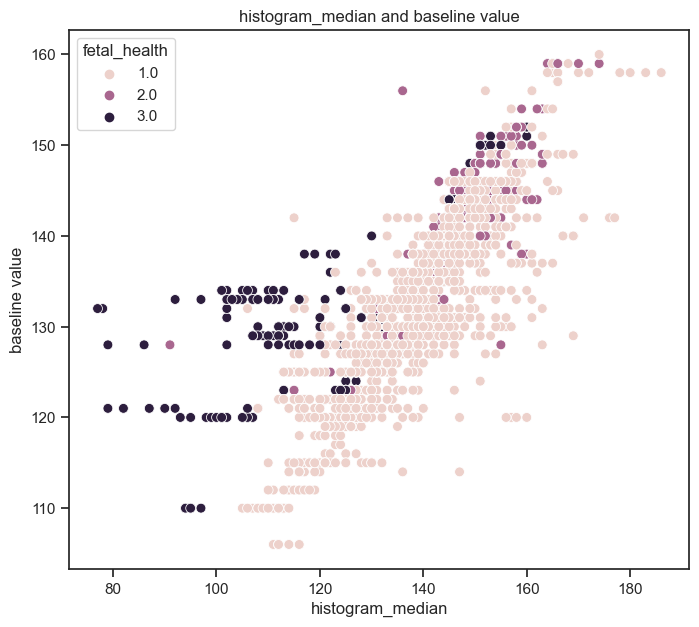

In [33]:
plt.figure(figsize=(8,7))
plt.title('histogram_median and baseline value')
sns.scatterplot(data=df,x='histogram_median',y='baseline value',hue='fetal_health',s=50)

## Uni-Variate Analysis

In [36]:
df.columns

Index(['baseline value', 'accelerations', 'fetal_movement',
       'uterine_contractions', 'light_decelerations', 'severe_decelerations',
       'prolongued_decelerations', 'abnormal_short_term_variability',
       'mean_value_of_short_term_variability',
       'percentage_of_time_with_abnormal_long_term_variability',
       'mean_value_of_long_term_variability', 'histogram_width',
       'histogram_min', 'histogram_max', 'histogram_number_of_peaks',
       'histogram_number_of_zeroes', 'histogram_mode', 'histogram_mean',
       'histogram_median', 'histogram_variance', 'histogram_tendency',
       'fetal_health'],
      dtype='object')

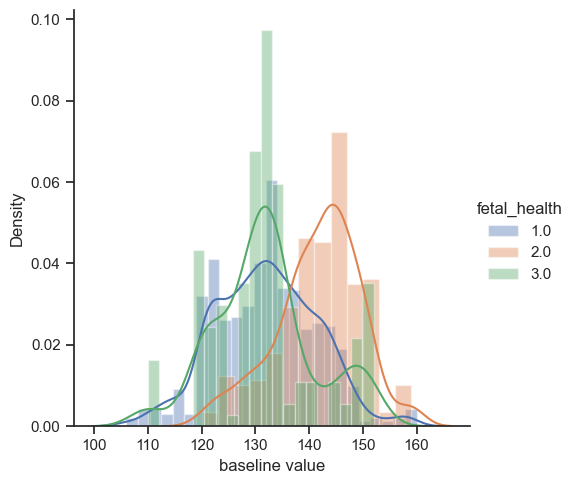

In [40]:
sns.FacetGrid(df, hue='fetal_health', height=5).map(sns.distplot,'baseline value').add_legend();

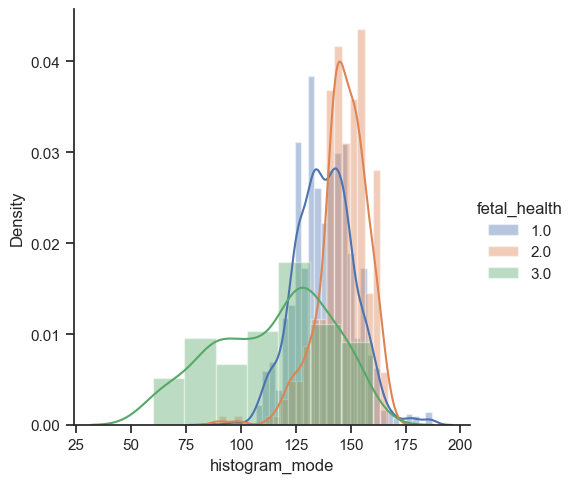

In [37]:
sns.FacetGrid(df, hue='fetal_health', height=5).map(sns.distplot,'histogram_mode').add_legend();

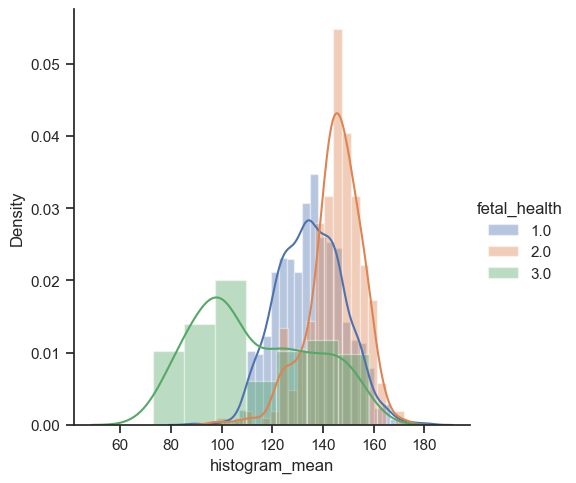

In [38]:
sns.FacetGrid(df, hue='fetal_health', height=5).map(sns.distplot,'histogram_mean').add_legend();

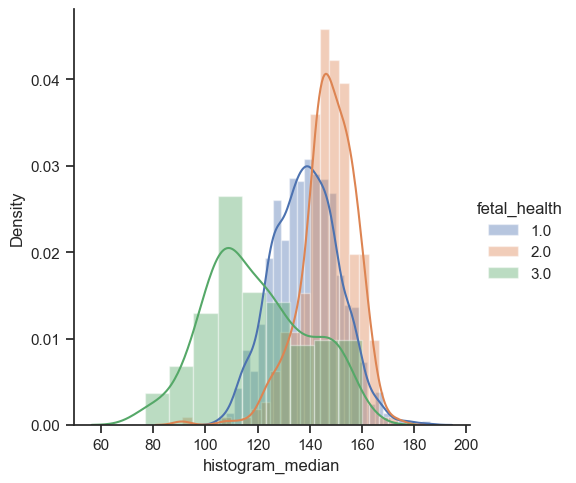

In [39]:
sns.FacetGrid(df, hue='fetal_health', height=5).map(sns.distplot,'histogram_median').add_legend();